In [1]:
import pandas as pd

### Read benchmark data

In [2]:
benchmarks_py = pd.read_csv('python/benchmarks_py.csv')
benchmarks_jl = pd.read_csv('julia/benchmarks_jl.csv')

benchmarks = pd.merge(
    benchmarks_py.sort_values(['Problem', 'Date', 'Python'], ascending=[True, True, False]).groupby('Problem').tail(1),
    benchmarks_jl.sort_values(['Problem', 'Date', 'Julia' ], ascending=[True, True, False]).groupby('Problem').tail(1),
    how = 'outer', 
    on = 'Problem'
).drop(columns = ['Date_x', 'Date_y']).set_index('Problem')

### Where is Python faster than Julia?

In [3]:
bm = benchmarks.copy()
bm.dropna(inplace=True)
bm['Faster (x times)'] = [round(j/p, 1) for (p, j) in zip(bm.Python, bm.Julia)]
bm.loc[bm['Faster (x times)'] > 1, ['Faster (x times)']].sort_values(by = 'Faster (x times)', ascending = False)

,Faster (x times)
Problem,
3,3.2
40,2.8
10,2.5
4,1.5
7,1.3
11,1.2


### Where is Julia not _subsecond_ in solving problems

In [4]:
ss = benchmarks.copy().drop(columns = 'Python')
ss['Julia'] = [round(ns / 1_000_000_000, 1) for ns in ss['Julia']]
ss.rename(columns={'Julia': 'Duration (seconds)'}, inplace = True)
ss.loc[ss['Duration (seconds)'] > 1].sort_values(by = 'Duration (seconds)', ascending = False)

,Duration (seconds)
Problem,
10,1.6
43,1.2


### Where is Python not _subsecond_ in solving problems

In [5]:
ss = benchmarks.copy().drop(columns = 'Julia')
ss['Python'] = [round(ns / 1_000_000_000, 1) for ns in ss['Python']]
ss.rename(columns={'Python': 'Duration (seconds)'}, inplace = True)
ss.loc[ss['Duration (seconds)'] > 1].sort_values(by = 'Duration (seconds)', ascending = False)

,Duration (seconds)
Problem,
31,207.0
39,27.6
14,8.0
41,2.9
43,2.6
12,2.3
47,2.0
27,1.9
32,1.7


#### Where is Julia faster than Python?

In [6]:
bm = benchmarks.copy()
bm.dropna(inplace=True)
bm['Faster (x times)'] = [round(p/j, 1) for (p, j) in zip(bm.Python, bm.Julia)]
bm.loc[bm['Faster (x times)'] > 1, ['Faster (x times)']].sort_values(by = 'Faster (x times)', ascending = False)

,Faster (x times)
Problem,
5,1239204.1
24,580237.8
28,57657.3
31,773.8
6,472.7
39,198.5
34,166.5
41,164.0
19,159.7


### Benchmark plots

In [7]:
import seaborn as sns

In [8]:
df = pd.melt(benchmarks.dropna().reset_index(), id_vars='Problem', value_vars=['Python', 'Julia'])
df.rename(columns={'Problem':'problem', 'variable':'language', 'value':'nanoseconds'}, inplace=True)

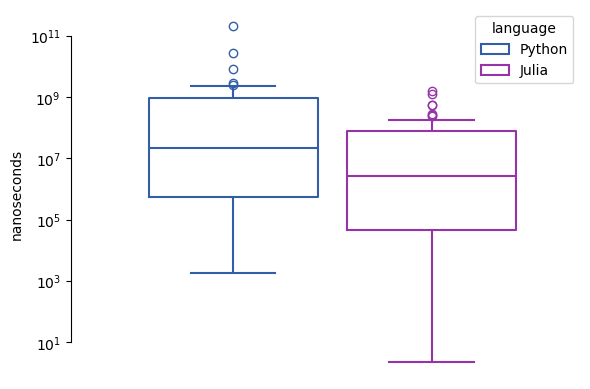

In [9]:
ax = sns.boxplot(y='nanoseconds', hue='language', palette=['#325ea8', '#9732a8'], fill=False, gap=.15, data=df)
ax.set_yscale('log')
sns.despine(offset=10, trim=True)